In [1]:
#STEP 1: IMPORT LIBRARIES ----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# leer los datos con pandas
df_data = pd.read_csv("Data.txt" , header=0, delimiter='\s+')
df_data



,frec(GHz),ta[mK],cont_sinlineas
0,110.106340,2.677450,-0.552761
1,110.137343,0.206389,-0.154683
2,110.168346,37.506100,0.312724
3,110.199349,101.238000,0.000011
4,110.231353,13.905600,-0.000011
5,110.262356,-1.090210,-0.000004
6,110.293359,1.890950,-0.000002


In [2]:

x_data = df_data['frec(GHz)']


C:\Users\Alejandro Yg\AppData\Local\Temp\ipykernel_17964\753383455.py:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


Fit parameters: 
C =  1.001684425824787 +- 437318.6910284026
X_mean = 110.1811476 +- 0.0014346769724459289
sigma =  0.004737929942149515 +- 531.0330528215784




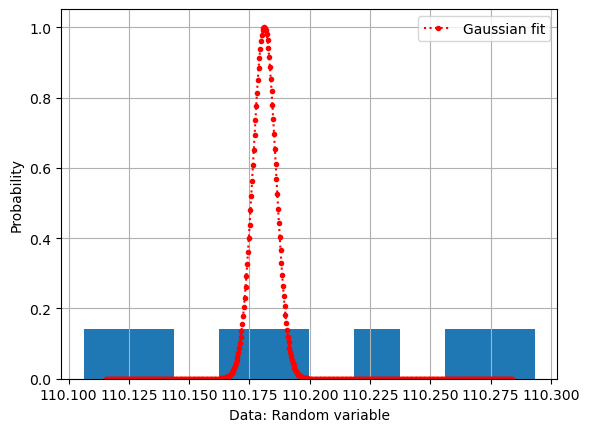

In [3]:
hist, bin_edges = np.histogram(x_data)
hist=hist/sum(hist)

n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist
       
#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

#print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
print("\n")


#STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


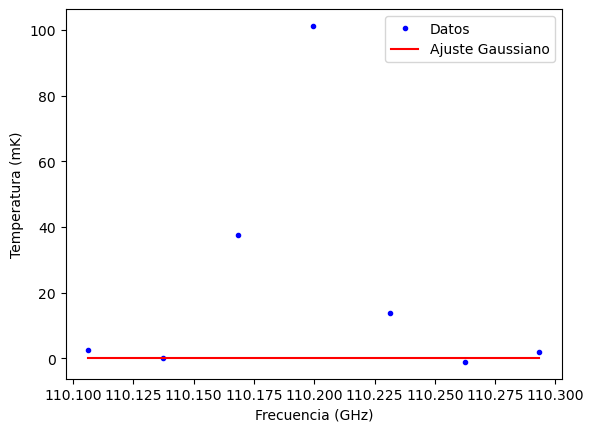

Parámetros del ajuste:
a = 1.0
b = 1.0
c = 1.0


In [4]:
frec = df_data['frec(GHz)']
ta= df_data['ta[mK]']

# Definimos la función gaussiana
def gauss(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Realizamos el ajuste
popt, pcov = curve_fit(gauss, frec, ta)

print(pcov)

# Graficamos los datos y la curva ajustada
plt.plot(frec, ta, 'b.', label='Datos')
plt.plot(frec, gauss(frec, *popt), 'r-', label='Ajuste Gaussiano')
plt.legend()
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Temperatura (mK)')
plt.show()

# Imprimimos los parámetros del ajuste
print('Parámetros del ajuste:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])

110.19851365000001
0.0034833346743198693


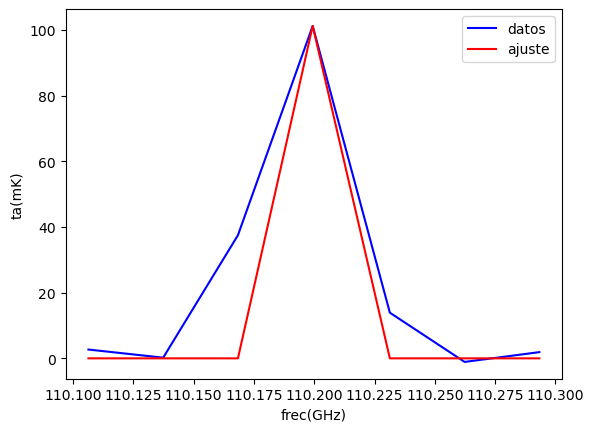

Parámetros ajustados: a = 101.340757, b = 110.199189, c = 0.003546


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función gaussiana
def gauss(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Datos
xdata = np.array([110.106340, 110.137343, 110.168346, 110.199349, 110.231353, 110.262356, 110.293359])
ydata = np.array([2.677450, 0.206389, 37.506100, 101.238000, 13.905600, -1.090210, 1.890950])


mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 
#p0=[max(y_hist),]
print(mean)
print(sigma)

# Estimaciones iniciales de los parámetros de la función gaussiana
p0 = [100, mean,sigma]

# Ajuste de la función gaussiana a los datos
popt, pcov = curve_fit(gauss, xdata, ydata, p0)

# Gráfico de los datos y la función ajustada
plt.plot(xdata, ydata, 'b-', label='datos')
plt.plot(xdata, gauss(xdata, *popt), 'r-', label='ajuste')
plt.xlabel('frec(GHz)')
plt.ylabel('ta(mK)')
plt.legend()
plt.show()

# Imprimir los parámetros ajustados
print('Parámetros ajustados: a = %f, b = %f, c = %f' % tuple(popt))